In [1]:
import torch
import numpy as np
from dsketch.raster.disttrans import point_edt2, line_edt2, curve_edt2_bruteforce
from dsketch.raster.raster import exp
import matplotlib.pyplot as plt
import matplotlib 

sz = 10
r = torch.linspace(-1, 1, sz)
c = torch.linspace(-1, 1, sz)
grid = torch.meshgrid(r, c)
grid = torch.stack(grid, dim=2)

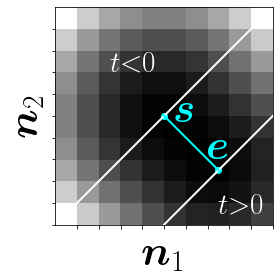

In [2]:
matplotlib.rcParams.update({'font.size': 42})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

line = torch.tensor([[0.5, 0.5], [0, 0]])
ldt2 = line_edt2(line, grid)

fr = plt.imshow(ldt2, cmap=matplotlib.cm.gray, interpolation='nearest')
fr.axes.xaxis.set_ticklabels([])
fr.axes.yaxis.set_ticklabels([])
plt.xticks(np.arange(0.5, 10, step=1))
plt.yticks(np.arange(0.5, 10, step=1))
fr.axes.set_ylabel(r'$\bm{n}_{2}$')
fr.axes.set_xlabel(r'$\bm{n}_{1}$')

plt.axline((0, 9), (sz-1, 0), color='white', linewidth=2)
plt.axline((5, 9), (sz-1, 5), color='white', linewidth=2)

plt.scatter([4.5,7],[4.5,7], color='cyan') 
plt.plot([4.5,7],[4.5,7], color='cyan', linewidth=2) 
plt.annotate(r"$\bm s$", (5, 4.8), color='cyan')
plt.annotate(r"$\bm e$", (6.5, 6.5), color='cyan')

plt.annotate(r"$\scriptstyle t<0$", (2,2.5), color='white')
plt.annotate(r"$\scriptstyle t>0$", (7,9), color='white')

plt.savefig('eqn4.pdf', bbox_inches='tight')

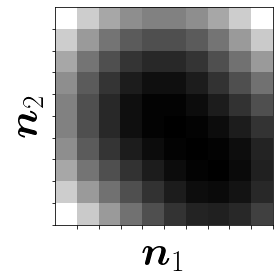

In [3]:
# fr = plt.imshow(ldt2, cmap=cmap_map(lambda x: x/2 + 0.5, matplotlib.cm.gray), interpolation='nearest')
fr = plt.imshow(ldt2, cmap=matplotlib.cm.gray, interpolation='nearest')
fr.axes.xaxis.set_ticklabels([])
fr.axes.yaxis.set_ticklabels([])
plt.xticks(np.arange(0.5, 10, step=1))
plt.yticks(np.arange(0.5, 10, step=1))
fr.axes.set_ylabel(r'$\bm{n}_{2}$')
fr.axes.set_xlabel(r'$\bm{n}_{1}$')

plt.savefig('eqn4b.pdf', bbox_inches='tight')

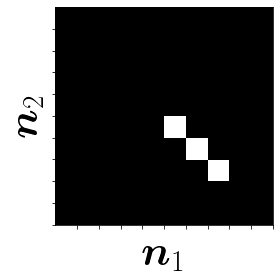

In [4]:
fr = plt.imshow(ldt2 < 0.01, cmap=matplotlib.cm.gray, interpolation='nearest')
fr.axes.xaxis.set_ticklabels([])
fr.axes.yaxis.set_ticklabels([])
plt.xticks(np.arange(0.5, 10, step=1))
plt.yticks(np.arange(0.5, 10, step=1))
fr.axes.set_ylabel(r'$\bm{n}_{2}$')
fr.axes.set_xlabel(r'$\bm{n}_{1}$')

plt.savefig('eqn5.pdf', bbox_inches='tight')

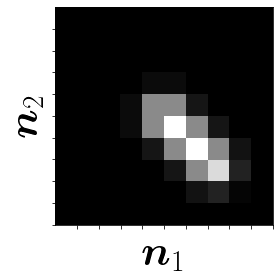

In [5]:
fr = plt.imshow(exp(ldt2, 0.04), cmap=matplotlib.cm.gray, interpolation='nearest')
fr.axes.xaxis.set_ticklabels([])
fr.axes.yaxis.set_ticklabels([])
plt.xticks(np.arange(0.5, 10, step=1))
plt.yticks(np.arange(0.5, 10, step=1))
fr.axes.set_ylabel(r'$\bm{n}_{2}$')
fr.axes.set_xlabel(r'$\bm{n}_{1}$')

plt.savefig('eqn6.pdf', bbox_inches='tight')

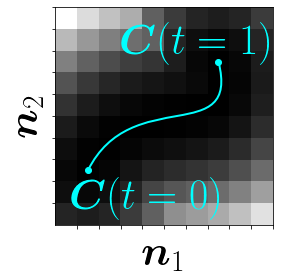

In [24]:
from matplotlib.path import Path
import matplotlib.patches as patches

sz = 10
r = torch.linspace(0, sz-1, sz)
c = torch.linspace(0, sz-1, sz)
grid = torch.meshgrid(r, c)
grid = torch.stack(grid, dim=2)

line = torch.tensor([[[2, 1], [6, 3], [3, 8], [7, 7]]])
ldt2 = curve_edt2_bruteforce(line, grid, iters=10, slices=10)[0]

verts = [
   (1, 2),  # P0
   (3, 6),  # P1
   (8, 3),  # P2
   (7, 7),  # P3
]

codes = [
    Path.MOVETO,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
]

path = Path(verts, codes)

fig, ax = plt.subplots()
ax.set_xlim(-0.5, 9)
ax.set_ylim(-0.5, 9)

fr = ax.imshow(ldt2, cmap=matplotlib.cm.gray, interpolation='nearest')
fr.axes.xaxis.set_ticklabels([])
fr.axes.yaxis.set_ticklabels([])
plt.xticks(np.arange(0.5, 10, step=1))
plt.yticks(np.arange(0.5, 10, step=1))
fr.axes.set_ylabel(r'$\bm{n}_{2}$')
fr.axes.set_xlabel(r'$\bm{n}_{1}$')

plt.scatter([1,7],[2,7], color='cyan') 
plt.annotate(r"$\bm C(t=0)$", (0.2, 0.2), color='cyan')
plt.annotate(r"$\bm C(t=1)$", (2.5, 7.3), color='cyan')

patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='cyan')
ax.add_patch(patch)

plt.savefig('eqn7.pdf', bbox_inches='tight')

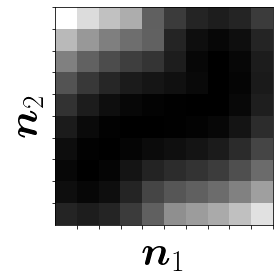

In [7]:
fig, ax = plt.subplots()
ax.set_xlim(-0.5, 9)
ax.set_ylim(-0.5, 9)

fr = ax.imshow(ldt2, cmap=matplotlib.cm.gray, interpolation='nearest')
fr.axes.xaxis.set_ticklabels([])
fr.axes.yaxis.set_ticklabels([])
plt.xticks(np.arange(0.5, 10, step=1))
plt.yticks(np.arange(0.5, 10, step=1))
fr.axes.set_ylabel(r'$\bm{n}_{2}$')
fr.axes.set_xlabel(r'$\bm{n}_{1}$')

plt.savefig('eqn7b.pdf', bbox_inches='tight')

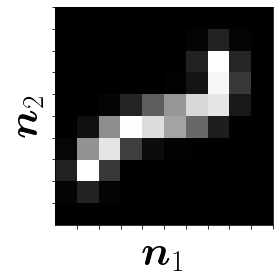

In [8]:
fig, ax = plt.subplots()
ax.set_xlim(-0.5, 9)
ax.set_ylim(-0.5, 9)

fr = ax.imshow(exp(ldt2, 0.5), cmap=matplotlib.cm.gray, interpolation='nearest')
fr.axes.xaxis.set_ticklabels([])
fr.axes.yaxis.set_ticklabels([])
plt.xticks(np.arange(0.5, 10, step=1))
plt.yticks(np.arange(0.5, 10, step=1))
fr.axes.set_ylabel(r'$\bm{n}_{2}$')
fr.axes.set_xlabel(r'$\bm{n}_{1}$')

plt.savefig('eqn8.pdf', bbox_inches='tight')